<a href="https://colab.research.google.com/github/mandar-solanki/ML_Regression_Methods_Exercise/blob/main/0725_MLRA_Capstone.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Data Exploration & EDA

In [1]:
## Importing required libariries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import Ridge, Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

%matplotlib inline


In [2]:
df = pd.read_csv('/content/sales_data.csv')
print(df.shape)
df.head()


(15289, 8)


,Advertising,Discount,Store_Size,Competitor_Price,Seasonality,Online_Presence,Economic_Index,Sales_Price
0,4174,18.943746,1416,498,0,1,86.664857,17053.275576
1,4507,7.763298,1979,416,1,1,85.231534,27592.090400
2,1860,11.552901,991,357,0,0,66.433347,6704.784592
3,2294,10.885732,1532,270,1,1,92.135533,13051.942532
4,2130,11.078227,1655,309,0,1,97.342439,5224.491564


In [3]:
df.describe()


,Advertising,Discount,Store_Size,Competitor_Price,Seasonality,Online_Presence,Economic_Index,Sales_Price
count,15289.000000,15289.000000,15289.000000,15289.000000,15289.000000,15289.000000,15289.000000,15289.000000
mean,3003.125123,12.477884,1250.217607,350.055726,0.503041,0.505200,75.036488,9742.238659
std,1155.386934,4.318831,432.943261,86.645301,0.500007,0.499989,14.384577,10431.687753
min,1000.000000,5.000139,500.000000,200.000000,0.000000,0.000000,50.006501,-33869.426249
25%,1994.000000,8.773985,873.000000,276.000000,0.000000,0.000000,62.586683,2698.709238
50%,2993.000000,12.445984,1251.000000,349.000000,1.000000,1.000000,75.142103,9765.060018
75%,4009.000000,16.187154,1622.000000,426.000000,1.000000,1.000000,87.592192,16742.723736
max,4999.000000,19.998390,1999.000000,499.000000,1.000000,1.000000,99.993755,54347.892806


In [4]:
df.isnull().sum()


,0
Advertising,0
Discount,0
Store_Size,0
Competitor_Price,0
Seasonality,0
Online_Presence,0
Economic_Index,0
Sales_Price,0


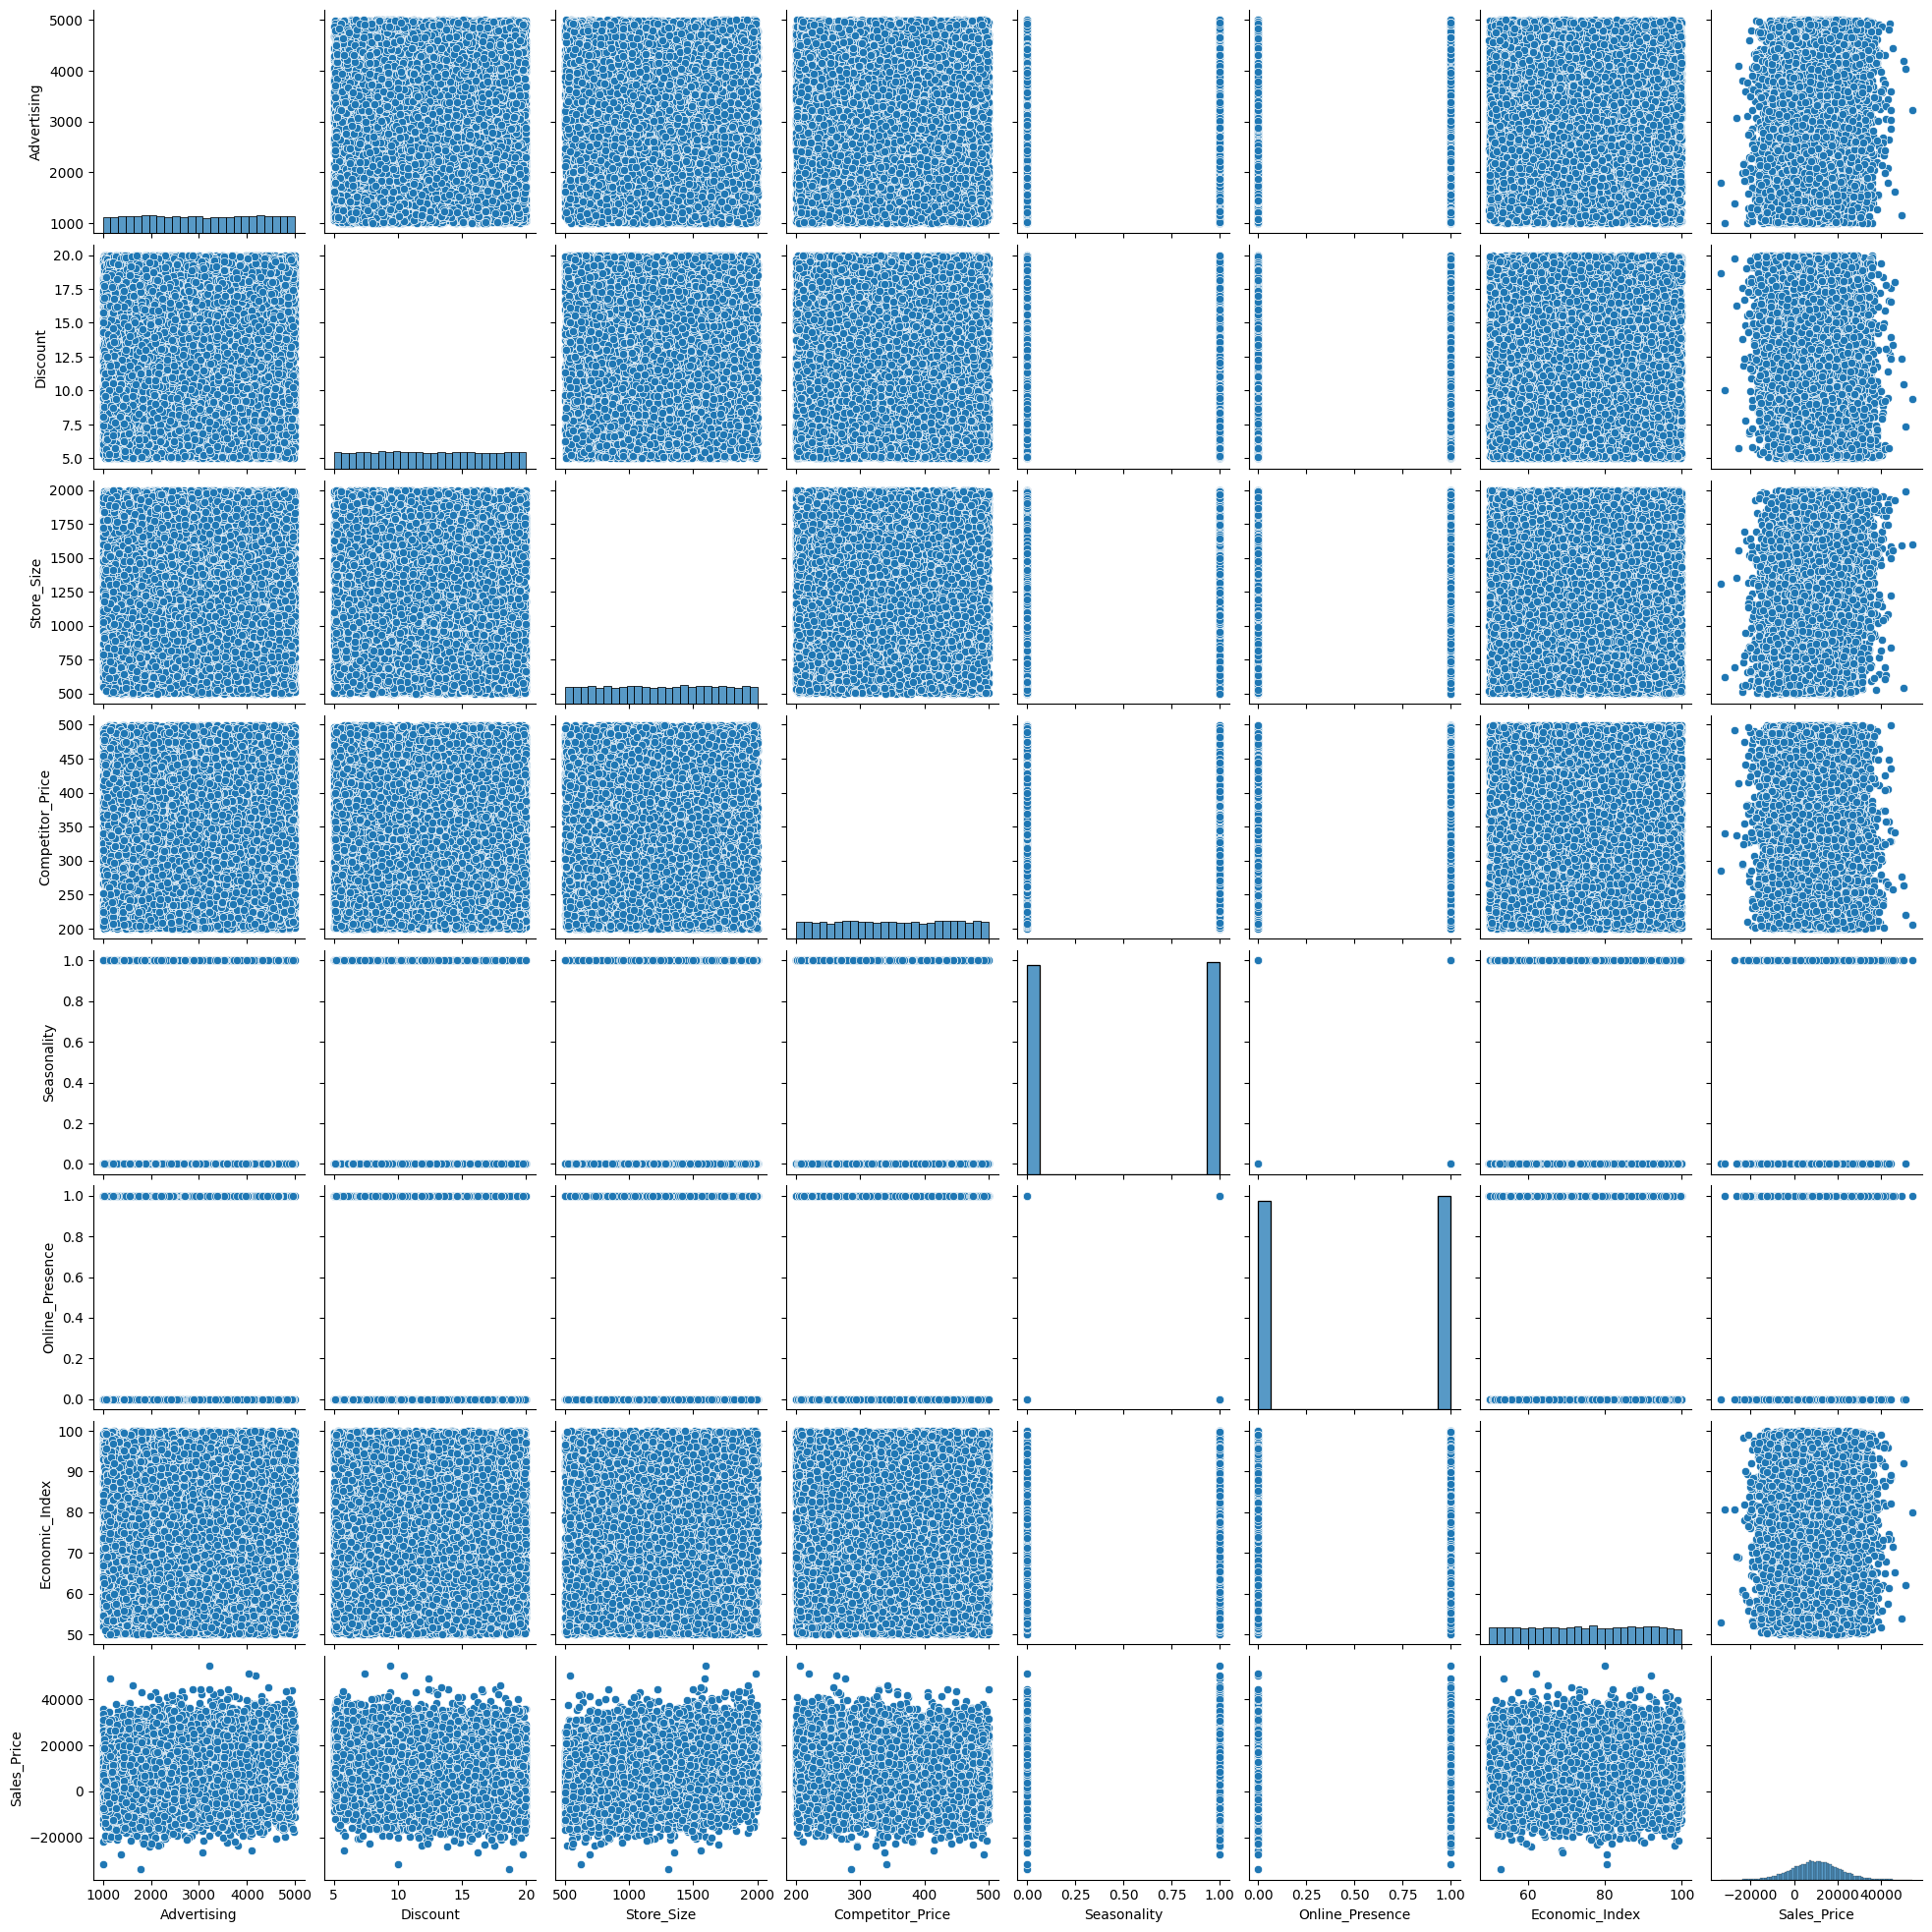

In [5]:
#Pairplot
sns.pairplot(df)
plt.show()


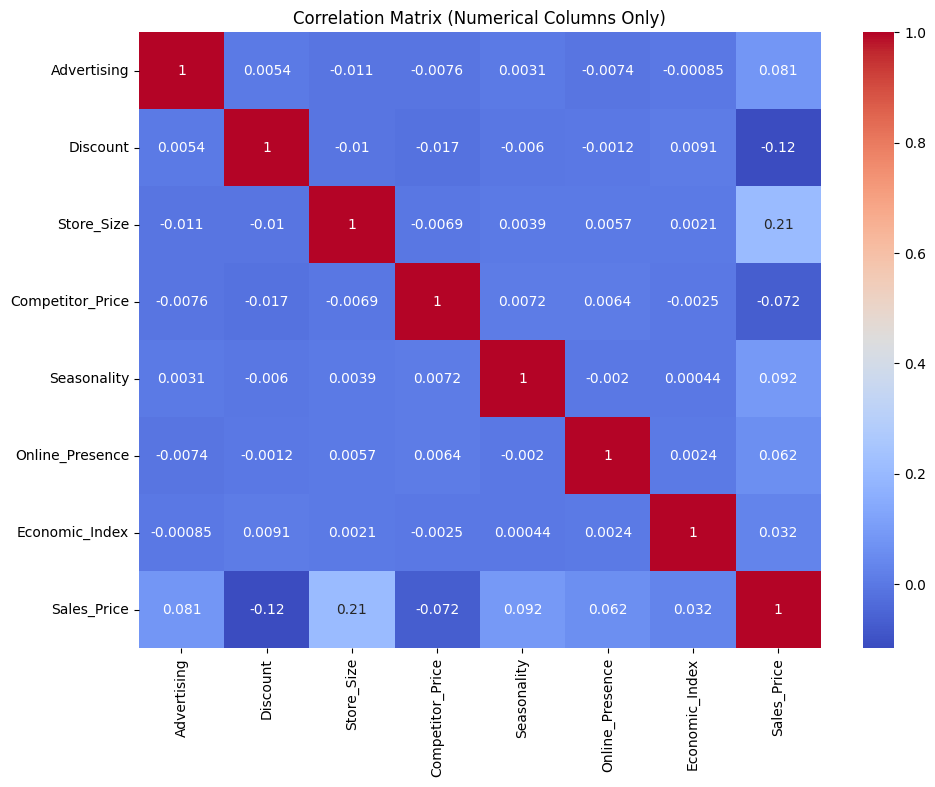

In [6]:
plt.figure(figsize=(11, 8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix (Numerical Columns Only)")
plt.show()


There is linear relationship between predictor and target variable. Hence, we can proceed with Multiple Linear Regression.

Given the low correlation coefficients, it is likely the R2 would be very low as well.


##Data Pre-processing and Model Build

In [7]:
X = df.iloc[:, :-1].values  ## Feature
y = df.iloc[:, -1].values    ## Target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


In [8]:
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)


In [9]:
print("R2 Score :", r2_score(y_test, y_pred))
print("Mean Squared Error :", mean_squared_error(y_test, y_pred))


R2 Score : 0.07750343915150038
Mean Squared Error : 103235739.78848413


In [10]:
kf = KFold(n_splits=5, shuffle=True, random_state=1)
cv_scores = cross_val_score(model, X, y, cv=kf, scoring='r2')
print("K-Fold R2 Scores:", cv_scores)
print("Average R2 Score:", np.mean(cv_scores))


K-Fold R2 Scores: [0.07907364 0.06739427 0.08632851 0.06308329 0.09980118]
Average R2 Score: 0.07913617767192913


## Regularization

In [11]:
# Standardization
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [12]:
model_ridge = Ridge(alpha=1)
model_ridge.fit(X_train_scaled, y_train)
y_pred_ridge = model_ridge.predict(X_test_scaled)

print("Ridge Regression:")
print("MSE:", mean_squared_error(y_test, y_pred_ridge))
print("R² Score:", r2_score(y_test, y_pred_ridge))


Ridge Regression:
MSE: 103235749.82813604
R² Score: 0.07750334943892234


In [13]:
model_lasso = Lasso(alpha=1)
model_lasso.fit(X_train_scaled, y_train)
y_pred_lasso = model_lasso.predict(X_test_scaled)

print("Lasso Regression:")
print("MSE:", mean_squared_error(y_test, y_pred_lasso))
print("R² Score:", r2_score(y_test, y_pred_lasso))


Lasso Regression:
MSE: 103235918.52127856
R² Score: 0.07750184202642996


In [14]:
## Define Parameter Grids
ridge_params = {'alpha': np.logspace(-4, 2, 50)}
lasso_params = {'alpha': np.logspace(-4, 2, 50)}


In [15]:
#Grid search for Ridge
ridge_grid = GridSearchCV(Ridge(), ridge_params, cv=4, scoring='r2')
ridge_grid.fit(X_train_scaled, y_train)

print("Best Ridge alpha:", ridge_grid.best_params_['alpha'])
print("Best Ridge R² score (CV):", ridge_grid.best_score_)


Best Ridge alpha: 100.0
Best Ridge R² score (CV): 0.07954057460430838


In [16]:
## Grid search for Lasso
lasso_grid = GridSearchCV(Lasso(), lasso_params, cv=4, scoring='r2')
lasso_grid.fit(X_train_scaled, y_train)

print("Best Lasso alpha:", lasso_grid.best_params_['alpha'])
print("Best Lasso R² score (CV):", lasso_grid.best_score_)


Best Lasso alpha: 3.39322177189533
Best Lasso R² score (CV): 0.07953258943527447


##Model Comparison

In [17]:
print("Base Model R² Score :", r2_score(y_test, y_pred))
print("K-Fold Average R² Score:", np.mean(cv_scores))
print("Ridge Regression R² Score:", r2_score(y_test, y_pred_ridge))
print("Best Ridge R² score (CV):", ridge_grid.best_score_)
print("Lasso Regression R² Score:", r2_score(y_test, y_pred_lasso))
print("Best Lasso R² score (CV):", lasso_grid.best_score_)


Base Model R² Score : 0.07750343915150038
K-Fold Average R² Score: 0.07913617767192913
Ridge Regression R² Score: 0.07750334943892234
Best Ridge R² score (CV): 0.07954057460430838
Lasso Regression R² Score: 0.07750184202642996
Best Lasso R² score (CV): 0.07953258943527447


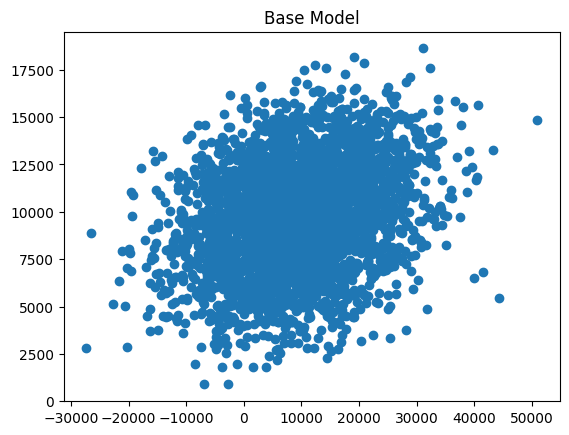

In [18]:
plt.scatter(y_test, y_pred, label='Base Model')
plt.title("Base Model")
plt.show()


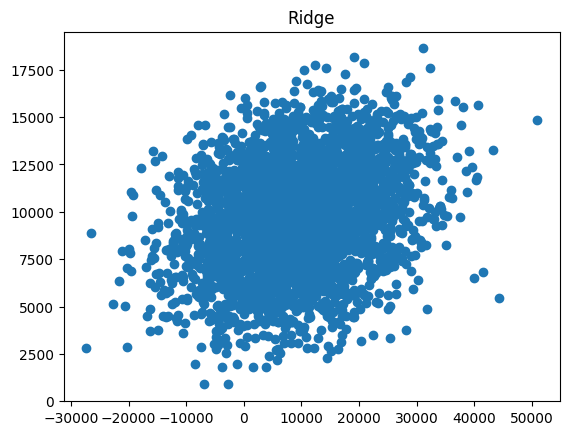

In [19]:
plt.scatter(y_test, y_pred_ridge, label='Ridge')
plt.title("Ridge")
plt.show()


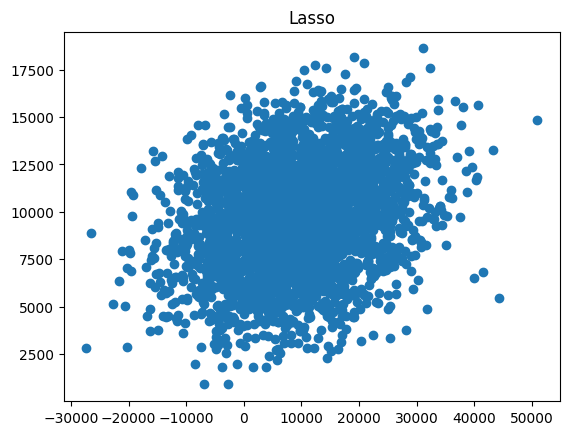

In [20]:
plt.scatter(y_test, y_pred_lasso, label='Lasso')
plt.title("Lasso")
plt.show()
